In [1]:
from ifapp.analize_data import gdal, np, gdal_array, plt
from ifapp.analize_data import ifapp_Mlearn, ifapp_raster
from ifapp.love_dframe import pkl_model_load

gdal.AllRegister()
gdal.UseExceptions()

In [6]:
dir_raster = r"D:\ix_onepy\Data\Data TIFF\Cidanau Java\Brick TIFF Cidanau"
dir_save = r"D:\ix_onepy\Data\Data TIFF\Cidanau Java\Brick TIFF Cidanau\Brick Data"
dir_model_ml = r"D:\ix_onepy\Data\Data Model"

load_ml_model = pkl_model_load(dir_model_ml + '/Ndvi_Savi.5_rbf.pkl')
print(load_ml_model)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Text(0.5, 1.0, 'Data Visualization')

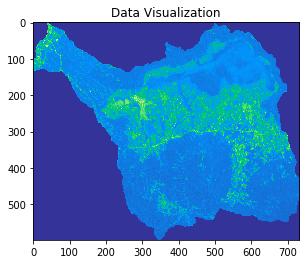

In [7]:
# load_raster_stc = ifapp_raster.stack_data(ifapp_raster, input_path=dir_raster,
#                                          name="_NDVI&SAVI")
load_raster_stc = gdal.Open(dir_raster + '/Brick Data_NDVI&SAVI.tif')
AOI = load_raster_stc.GetRasterBand(1).ReadAsArray()
AOI = AOI > 0
img2num = ifapp_raster.ras2num(load_raster_stc)
plt.imshow(img2num[:, :, 2], cmap=plt.get_cmap('terrain'))
plt.title('Data Visualization')

In [8]:
## Prediction model with data image
new_shape = (img2num.shape[0] * img2num.shape[1], img2num.shape[2])
img_as_array = img2num[:, :, :6].reshape(new_shape)
# img_as_array[np.isnan(img_as_array)] = 0
img_as_array = np.nan_to_num(img_as_array)
print('Reshaped from {o} to {n}'.format(o=img2num.shape, n=img_as_array.shape))

Reshaped from (598, 732, 6) to (437736, 6)


In [9]:
model2data_pred = load_ml_model.predict(img_as_array)
model2data = model2data_pred.reshape(img2num[:, :, 0].shape)
model2data[model2data < 0.00] = 0.00
model2data[model2data > 1.00] = 1.00
final_pred = model2data * AOI ## SVR
print("Before: ", model2data.max(), "...", "After: ", final_pred.max())
print("Before: ", model2data.min(), "...", "After: ", final_pred.min())

Before:  1.0 ... After:  1.0
Before:  0.0 ... After:  0.0


In [10]:
ifapp_raster.saved_data_TIF(dir_save, final_pred, name='_NDVI&SAVI_',
                           ras=(dir_raster + '/Brick Data_NDVI&SAVI.tif'))